In [651]:
import pandas as pd
import numpy as np
from scipy import stats

import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline


from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [427]:
## generate data 
# y = aX + e
m = np.array([1,2,3,4], ndmin=3, dtype='S')
m2 = m.view()
n = 100 
a = np.random.randn(n, 1) + 2
e = np.random.randn(n, 1)
X = np.random.randint([0, 20, 30], size=(n, 3), high=[[40]])

y =  (a*X) + e #element wise 
y =  (X.T @ a.flatten() ) + e # dot product 

for x, i in zip((m, m2, a, X, e, y), ('m','m2','a', 'X', 'e', 'y') ):
    print( f"Shape of {i} is \t{x.shape}\t{x.ndim}\t{x.dtype}\t{type(x)}\t{x.base}")
    

Shape of m is 	(1, 1, 4)	3	|S1	<class 'numpy.ndarray'>	[b'1' b'2' b'3' b'4']
Shape of m2 is 	(1, 1, 4)	3	|S1	<class 'numpy.ndarray'>	[b'1' b'2' b'3' b'4']
Shape of a is 	(100, 1)	2	float64	<class 'numpy.ndarray'>	None
Shape of X is 	(100, 3)	2	int64	<class 'numpy.ndarray'>	None
Shape of e is 	(100, 1)	2	float64	<class 'numpy.ndarray'>	None
Shape of y is 	(100, 3)	2	float64	<class 'numpy.ndarray'>	None


In [78]:
y =  (a*X) + e #element wise
y[0]
y =  (X.T @ a.flatten() ) + e # dot product 
y[0]
y =  (a.T @ X ) + e # dot product 
y[0]
y =  (a.flatten() @ X ) + e # dot product 
y[0]

array([25.46035914, 26.44488928, 33.33660022])

array([3938.31496349, 6024.42063199, 7092.15771902])

array([3938.31496349, 6024.42063199, 7092.15771902])

array([3938.31496349, 6024.42063199, 7092.15771902])

In [44]:
### astype returns a copy
# m
# m.astype('i4')
# m2 = m.astype(bool)
# m2[:,:,2] = False
# m
# m2
# m2.astype(int)
# m3 = m.copy()
# m3[:,:,2] = 'c'
# m
# m3
# m4 = m.view()
# m4
# m
# m4[:,:,2]='CC'
# m4
# m

In [110]:
### Reshaping, whiich returns a view and not copy 
# m.shape
# ## reshape(-1) = flatten = 1-D
# m.flatten().shape
# m.reshshape(-1, m2.shape[2]//2)
# z.shape
# z[0]
# e.shape
# e.flatten().shape
# e.flatten()[0]
# e.reshape((50,2))[0]
# e.reshape((-1,2))[0]  ##ape(-1).shape
# z = m2.re auto calc the -1 dim

In [112]:
# ### iterate nditer
# m

# for x in np.nditer(m, flags=['buffered'], op_dtypes=['S']):
#     print(x)

# for i, x in np.ndenumerate(m):
#     print( f"{i}\t{x}")

# for i, x in np.ndenumerate(z):
#     print( f"{i}\t{x}")

# for i, x in np.ndenumerate(m.flatten()):
#     print( f"{i}\t{x}")

In [150]:
# m.shape
# z.shape
# m2 = m2.astype(int)
# m2.shape
# z2 = m2.reshape(-1, 2)*10
# z, z.shape
# z2, z2.shape
# print("---")
# np.concatenate( (z, z2), axis=0 ).shape
# np.concatenate( (z, z2), axis=1 ).shape
# np.stack( (z, z2)  , axis=1).shape
# np.dstack( (z, z2)  ).shape
# print("---")
# np.hstack( (z, z2)  )
# np.vstack( (z, z2)  )

In [190]:
# m
# np.array_split(m.flatten(), 3)
# np.array_split(m, 2, axis=2)
## np.vsplit(m, 2)

In [209]:
# m2, z2
# np.where( m2.flatten()%10==0 )
# np.where( z2.flatten()%10==0 )
# z2.flatten()[np.where( z2.flatten()%20==0 )]
# z3 = z2.flatten()
# z3
# np.searchsorted( z3, [37,43]) ##binary search on a sorted array side=left|right


In [227]:
## np.sort returns a copy 
### filter using boolean indexing as seen previously
# q = a[0:6]
# q2 = q.reshape(3, -1)
# q2
# np.sort(q, axis=0)
# np.sort(q.flatten())
# np.sort(q2, axis=0)
# np.sort(q.reshape(2,-1))

In [235]:
# "__".join( [ str(np.random.choice( m.flatten(), size=(2,3)) )  for i in range(10) ] )

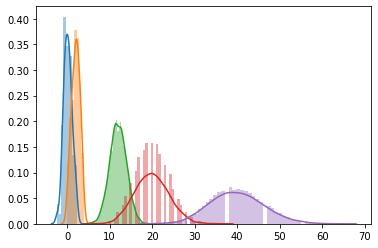

In [284]:
## Permutations:: np.shuffle alters current array in place, np.permutation returns new array 

### dists
sns.distplot(e, label='norm-errorr');
sns.distplot(a, label='b-coeff');
sns.distplot( np.random.normal(loc=12, scale=2, size=(n*n,1)), label='gauss'); 
sns.distplot( np.random.binomial(n=n, p=0.2, size=(n*n,1)), label='binom');
sns.distplot( np.random.poisson(lam=n*.4,size=(n*n,1)), label='poiss');

plt.legend = True
plt.show();

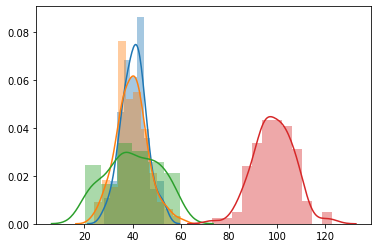

In [306]:
sns.distplot( np.random.binomial(n=n, p=0.4, size=(n,1)), label='binom');
sns.distplot( np.random.poisson(lam=n*.4,size=(n,1)), label='poiss');
sns.distplot( np.random.uniform(low=20, high=60, size=(n,1)), label='uni');
# sns.distplot( np.random.multinomial(n=4, pvals=[0.4,0.3,0.2,0.1], size=(n,1)), label='multinom');
## logistic distribution - describe growth 
sns.distplot( np.random.logistic(loc=100, scale=5, size=(n,1)), label='logistic');

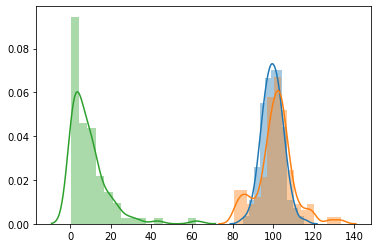

In [314]:
sns.distplot( np.random.normal(loc=100, scale=5, size=(n,1)), label='norm');
sns.distplot( np.random.logistic(loc=100, scale=5, size=(n,1)), label='logistic');
sns.distplot( np.random.exponential(scale=10, size=(n,1)), label='expo');

In [315]:
# sns.distplot( np.random.multinomial(n=4, pvals=[0.4,0.3,0.2,0.1], size=(n*n,1)), label='multinom');

In [351]:
### ufuncs
#type(np.log)==np.ufunc
# type(np.arcsin) 
# z2, m2
# np.unique(z2)
# np.union1d(z2, m2)
# np.intersect1d(z2, m2, assume_unique=True)
# np.setdiff1d(z2, m2, assume_unique=True)
# np.setxor1d(z2.reshape(-1), m2.flatten(), assume_unique=True)

In [355]:
def f(x):
    return lambda c: c * x

f(2)
[f(2)(i) for i in range(10)]
[f(10**3)(i) for i in range(10)]

[c for c in "something"]

class MonIter():
    def __iter__(self):
        self.x = 1;
        return self
    def __next__(self):
        if self.x >20:
            raise StopIteration 
        x = self.x**2
        self.x += 1
        return x
    
[f"{i+1}^2 = {x}" for i, x in enumerate(iter(MonIter())) ]

<function __main__.f.<locals>.<lambda>(c)>

[0, 2, 4, 6, 8, 10, 12, 14, 16, 18]

[0, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000]

['s', 'o', 'm', 'e', 't', 'h', 'i', 'n', 'g']

['1^2 = 1',
 '2^2 = 4',
 '3^2 = 9',
 '4^2 = 16',
 '5^2 = 25',
 '6^2 = 36',
 '7^2 = 49',
 '8^2 = 64',
 '9^2 = 81',
 '10^2 = 100',
 '11^2 = 121',
 '12^2 = 144',
 '13^2 = 169',
 '14^2 = 196',
 '15^2 = 225',
 '16^2 = 256',
 '17^2 = 289',
 '18^2 = 324',
 '19^2 = 361',
 '20^2 = 400']

In [568]:
# txt = "The quick brown fox jumped over the lazy dogs!!"
# txt.split(" ")
# txt.replace("e", "E")
# txt.startswith("The")
# txt.endswith("The")
# print("----")
# import re
# re.search("the", txt.lower())
# re.findall("the", txt.lower()) 
# re.split("the", txt.lower() )
# re.sub("\st", "_", txt.lower() )

In [569]:
# z2
# z2.mean(axis=0)
# np.median(z2, axis=0)
# # np.mode(z2, axis=0)
# stats.mode(z2, axis=0)

# print("--- a ---")
# a.mean()
# np.median(a)
# a.std()
# stats.mode(a)
# np.percentile(a, 90)


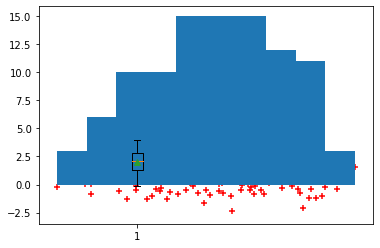

In [391]:
plt.hist(a);
plt.scatter(a, e, marker="+", c="r")
plt.boxplot(a, showmeans=True);

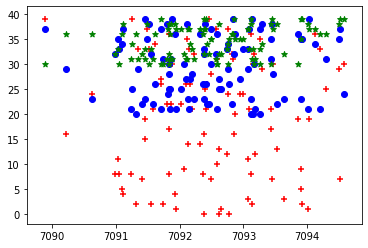

In [408]:
y.shape, X.shape


plt.scatter(y[:,2], X[:,0], marker="+", c="r"); 
plt.scatter(y[:,2], X[:,1], marker="o", c="b"); 
plt.scatter(y[:,2], X[:,2], marker="*", c="g"); 

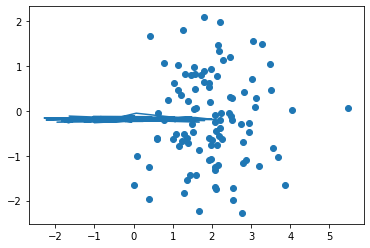

In [429]:
md = stats.linregress( a.flatten(), e.flatten() )
md


plt.scatter(a, e)
plt.plot(e, list(map(lambda x: x*md.slope + md.intercept, a) )); 

Shape of a is 	(3, 1)	2	float64	<class 'numpy.ndarray'>	None
Shape of X is 	(100, 3)	2	int64	<class 'numpy.ndarray'>	None
Shape of e is 	(100, 1)	2	float64	<class 'numpy.ndarray'>	None
Shape of y is 	(100,)	1	float64	<class 'numpy.ndarray'>	None


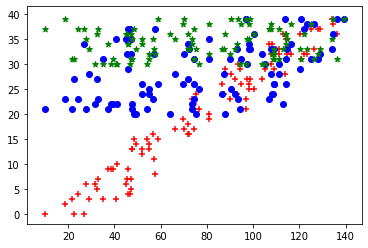

In [558]:
## a = coeffs
## e = error terms normally distributed
## X = independent variables
## y = dependent variable 
np.random.seed(9099)
a = np.random.randn(3, 1)
y = (X@a ) + e
y = y.flatten()
for x, i in zip((a, X, e, y), ('a', 'X', 'e', 'y') ):
    print( f"Shape of {i} is \t{x.shape}\t{x.ndim}\t{x.dtype}\t{type(x)}\t{x.base}")

plt.scatter(y, X[:,0], marker="+", c="r"); 
plt.scatter(y, X[:,1], marker="o", c="b"); 
plt.scatter(y, X[:,2], marker="*", c="g"); 

# # plt.scatter(X[:,1],y, label="x1");
# # plt.scatter(X[:,0],y, label="x0");

# print("---")
# md = stats.linregress(X[:,0], y)  
# print(md)
# print("---")
# plt.plot(y, np.array(list(map(lambda x_: x_*md.slope + md.intercept, X[:,0]) )  )  );

In [556]:
# np.concatenate(([3], [0]*5, np.arange(-1, 1.002, 2/9.0)))
# np.r_[3,[0]*5,-1:1:10j]

   2
1 x + 2 x + 1
   4     3     2
1 x + 4 x + 6 x + 4 x + 1
           12            11             10
4.175e-09 x  + 5.01e-08 x  + 2.756e-07 x 
        3     2
0.3333 x + 1 x + 1 x + 10
 
2 x + 2
[    121   10201 1002001]


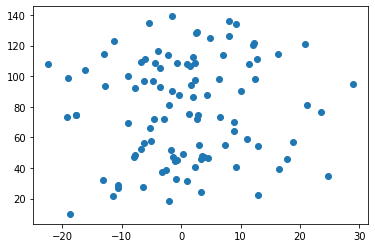

In [535]:
f = np.poly1d([1,2,1])
print(f)
print(f*f)
print( f.integ(m=10))
print( f.integ(k=10) )
print( f.deriv() )
print( f([10, 100, 1000]) )

# X2 = np.linspace(1, 6, n)
# X2 = np.logspace(1, 6, n)
# X2 = np.random.randint(0,high=10, size=(n,))
X2 = np.random.normal(loc=0,scale=10, size=(n,))
y2 = f(X2)

# sns.distplot(y2)
# sns.distplot(X2)
plt.scatter(X2, y);

# sns.distplot( np.select([y2<=-10, y2>=10], [y2, y2] ));

In [551]:
from scipy import linalg as scalg
from scipy import special as scip

In [572]:
# scip.factorial( 4 )
# scip.comb( 4, 2 ) # NCk = (n!/k!(n-k)!) << combination
# scip.factorial(4)/(scip.factorial(2) * scip.factorial(4-2))

# scip.comb( 4, 2 , repetition=True) # NPk = (n!/(n-k)!) << permutation ??? Nope not working by calc
# scip.perm(4, 2)
# scip.factorial(4)/(scip.factorial(4-2) )

In [555]:
# z2
# Z2 = np.mat(z2)
# Z2
# z2.T, Z2.T
# scalg.inv(z2), Z2.I
# z2*z2, z2@z2

In [573]:
### Solving linear systems of equations @ linalg.solve
# Bz = np.array([
#     [1,2,2],
#     [3,5,3],
#     [5,1,8]
# ]).T

# y3 = np.array([10, 8, 3])
# bz, y3
# scalg.inv(Bz) @ y3

# scalg.solve(Bz, y3)

# print("----")
# scalg.det(Bz)
# scalg.norm(Bz)

In [583]:
from scipy import stats 
# #dir(stats)
# [d for d in dir(stats) if isinstance(getattr(stats, d), stats.rv_continuous)]
# [d for d in dir(stats) if isinstance(getattr(stats, d), stats.rv_discrete)]

(10.0, 2.0, 4.0, 7.554147265981002e-06)

--X3--


((100, 3), array([ 8.72223025,  9.80533287, 12.07152744]))

(10.06131798556908, 2.1599355309659343, 4.7912146525110835, 15.973732617813805)

DescribeResult(nobs=100, minmax=(array([4.79121465, 4.97216136, 5.70264258]), array([15.97373262, 14.76855424, 15.7977959 ])), mean=array([ 9.94744355,  9.96348703, 10.27302338]), variance=array([4.93612882, 4.13555927, 4.99761195]), skewness=array([ 0.23418823, -0.05563557,  0.05868201]), kurtosis=array([ 0.0029307 , -0.16617161, -0.45821995]))

--y3--


((100, 3), array([ 94.52176112, 116.7552184 , 170.86482951]))

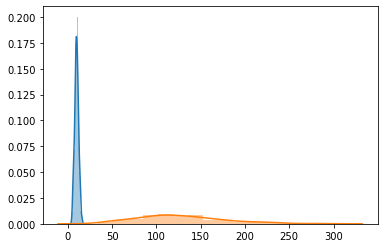

In [623]:
# stats.norm.cdf(1.645 )
# np.random.seed(9909)
# X3 = stats.norm.rvs(size=(n,3), loc=0, scale=1, random_state=9909)
x3_norm_dist = stats.norm(loc=10, scale=2)
x3_norm_dist.mean(), x3_norm_dist.std(), x3_norm_dist.var(), x3_norm_dist.pdf(0.975)

print("--X3--")
X3 = x3_norm_dist.rvs((n,3), random_state=9909)
X3.shape, X3[0]
X3.mean(), X3.std(), X3.min(), X3.max()
stats.describe(X3)

print("--y3--")
y3 = f(X3)
y3.shape, y3[0]

sns.distplot(X3 )
sns.distplot(y3 ) 

In [645]:
## T-tests, KS-tests, etc
print('-- ttest One sample ---')
np.round(stats.ttest_1samp(X3, 10 ), decimals=3 )
# assume diff pop means for each X_i
np.round(stats.ttest_1samp(X3, [10,0, 5] ), decimals=3 )
np.round(stats.ttest_1samp(y3, 10 ), decimals=3 )

print('-- ttest Two sample ---')
"X3: means", X3[:,0].mean(), X3[:,1].mean()
np.round(stats.ttest_ind(X3[:,0], X3[:,1]), decimals=3 )
"X3Vsy3 means: ", X3.mean(), y3.mean()
np.round(stats.ttest_ind(X3, y3), decimals=3 )

print('-- KS @ dist t---')
"is t: ", np.round( stats.kstest(X3[:,0], 't' , (n-2,)), decimals=3)
"is norm: ",np.round( stats.kstest(X3[:,0], 'norm') , decimals=3)
"is similar dist: ", np.round( stats.ks_2samp(X3[:,0], X3[:,1] ), decimals=3)

-- ttest One sample ---


array([[-0.237, -0.18 ,  1.221],
       [ 0.813,  0.858,  0.225]])

array([[-0.237, 48.994, 23.587],
       [ 0.813,  0.   ,  0.   ]])

array([[22.826, 25.563, 23.895],
       [ 0.   ,  0.   ,  0.   ]])

-- ttest Two sample ---


('X3: means', 9.947443550395114, 9.963487027205753)

array([-0.053,  0.958])

('X3Vsy3 means: ', 10.06131798556908, 127.01807707580309)

array([[-22.814, -25.545, -23.819],
       [  0.   ,   0.   ,   0.   ]])

-- KS @ dist t---


('is t: ', array([1., 0.]))

('is norm: ', array([1., 0.]))

('is similar dist: ', array([0.07 , 0.968]))

((100,), (100,))

((100,), (100,))

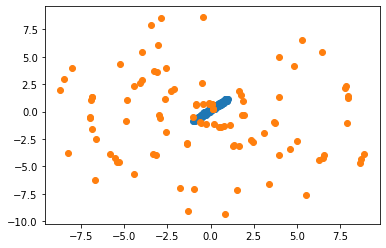

In [655]:
X4 = np.linspace(-1, 1, n)
y4 = X4 + 0.3*np.random.random(X4.size)
X4.shape, y4.shape
plt.scatter(X4, y4)

unif = np.random.uniform(0, 10, size=n)
X5 = unif * np.cos( np.pi * unif )
y5 = unif * np.sin( np.pi * unif ) + 0.4*np.random.random(X5.size)
X5.shape, y5.shape
plt.scatter(X5, y5)

eigen: l, v
svd: U, S, Vh
flip up down


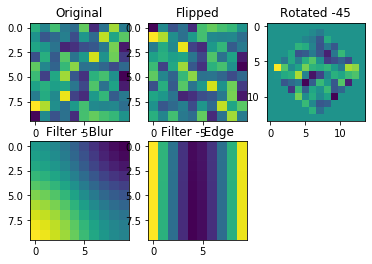

In [704]:
#np.shuffle( np.arange(7) )
from scipy import misc, ndimage 

z2
scalg.inv(z2)
print("eigen: l, v")
scalg.eig(z2)
print("svd: U, S, Vh")
scalg.svd(z2)
print("flip up down")
np.flipud( z2 )

img = e.reshape((-1, 10))
nr, nc=2, 3
plt.subplot(nr,nc,1)
plt.imshow( img  )
plt.title('Original')
plt.subplot(nr,nc,2)
plt.imshow( np.flipud( img ) )
plt.title('Flipped')
plt.subplot(nr,nc,3)
plt.imshow( ndimage.rotate( img , -45) )
plt.title('Rotated -45')
plt.subplot(nr,nc,4)
plt.imshow( ndimage.gaussian_filter( img , sigma=10) )
plt.title('Filter - Blur');
plt.subplot(nr,nc,5)
plt.imshow( ndimage.sobel( ndimage.gaussian_filter( img , sigma=10) ) )
plt.title('Filter - Edge');

array([-0.02153435, -0.19117348, -1.10586363, -0.80366235,  0.67230003,
       -1.55714473, -0.91781763, -0.88592559, -1.00741512, -0.70994201])

('KS: Is it normal: ',
 KstestResult(statistic=0.39910329089634156, pvalue=0.05992855474499336))

('KS: Is it t-stud: ',
 KstestResult(statistic=0.3985205170433427, pvalue=0.060545551530289))

('Shp: Is it normal: ', (0.9894329905509949, 0.6189365983009338))

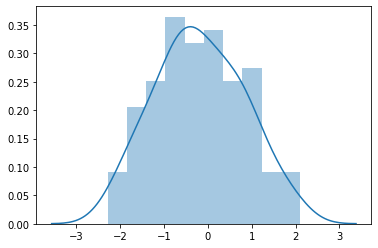

In [716]:
stats.kurtosis( img )
"KS: Is it normal: ", stats.kstest(img, "norm")
"KS: Is it t-stud: ", stats.kstest(img, "t", (n-1,))
"Shp: Is it normal: ", stats.shapiro(img)
sns.distplot( img , bins=10)

In [724]:
#### ---- PD stuff
df = pd.DataFrame({
    "x1": np.linspace(1,5, n),
    "x2" : np.random.normal(loc=10, size=n),
    "y" : np.random.randint(low=0, high=2, size=n)
})
df['y_lbl'] = np.where( df.y == 0, 'control', 'treat')
df.info()
df.head()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      100 non-null    float64
 1   x2      100 non-null    float64
 2   y       100 non-null    int64  
 3   y_lbl   100 non-null    object 
dtypes: float64(2), int64(1), object(1)
memory usage: 3.2+ KB


,x1,x2,y,y_lbl
0,1.000000,10.567731,1,treat
1,1.040404,8.648867,0,control
2,1.080808,10.675618,1,treat
3,1.121212,10.868435,1,treat
4,1.161616,11.113345,0,control


,x1,x2,y,y_lbl
count,100.000000,100.000000,100.000000,100
unique,NaN,NaN,NaN,2
top,NaN,NaN,NaN,treat
freq,NaN,NaN,NaN,53
mean,3.000000,9.884501,0.530000,NaN
std,1.172181,1.060863,0.501614,NaN
min,1.000000,7.918418,0.000000,NaN
25%,2.000000,8.981838,0.000000,NaN
50%,3.000000,9.908989,1.000000,NaN
75%,4.000000,10.680589,1.000000,NaN


In [726]:
df2 = pd.read_csv("chord-progressions.csv", index_col=False)
df2.info()
df2.head()
df2.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   1st chord            28 non-null     int64 
 1   2nd chord            28 non-null     int64 
 2   3rd chord            28 non-null     int64 
 3   4th chord            28 non-null     int64 
 4   Progression Quality  28 non-null     object
dtypes: int64(4), object(1)
memory usage: 1.2+ KB


,1st chord,2nd chord,3rd chord,4th chord,Progression Quality
0,6,4,1,5,Alternative
1,4,4,1,5,Catchy
2,1,1,1,1,Didgeridoo
3,1,6,4,5,Dreadful
4,1,6,2,5,Dreadful


,1st chord,2nd chord,3rd chord,4th chord,Progression Quality
count,28.000000,28.000000,28.000000,28.000000,28
unique,NaN,NaN,NaN,NaN,20
top,NaN,NaN,NaN,NaN,Sad
freq,NaN,NaN,NaN,NaN,3
mean,2.000000,4.035714,3.142857,4.500000,NaN
std,1.763834,1.643892,1.938199,1.575272,NaN
min,1.000000,1.000000,1.000000,1.000000,NaN
25%,1.000000,4.000000,1.000000,4.000000,NaN
50%,1.000000,4.000000,3.500000,5.000000,NaN
75%,2.000000,5.000000,5.000000,5.250000,NaN


---
-----


array([ 1. ,  6. , 21.5, 27.5, 33.3, 36. ])

Int64Index([6, 8], dtype='int64')

[nan, -5.0, 8.0, -35.0, 0.0, 25.0, -21.0, 18.0, -3.0, -11.0]

[nan, nan, 13.0, -43.0, 35.0, 25.0, -46.0, 39.0, -21.0, -8.0]

-----


Other    11
8         7
dtype: int64

----


0    _*0_*
6    _*F_*
dtype: object

----


,dated,year,year-month,yr-mon2,month,month_name,day,dofweek,day_name,week
0,2020-05-11,2020,2020-5,2020-05-11,5,May,11,0,Monday,20
1,2020-09-03,2020,2020-9,2020-09-03,9,September,3,3,Thursday,36
2,2019-04-26,2019,2019-4,2019-04-26,4,April,26,4,Friday,17
3,2017-09-13,2017,2017-9,2017-09-13,9,September,13,2,Wednesday,37
4,2020-11-19,2020,2020-11,2020-11-19,11,November,19,3,Thursday,47


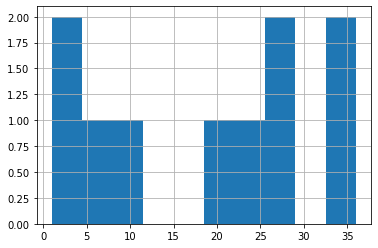

In [936]:

randz = np.random.RandomState(8160)

s1 = pd.Series( z2.flatten() )
# s1.values
# s1.tolist()
print("---")
s2 = pd.Series(['c', ['d'], ['e', 'f', 'g'], ['a', 'b'], '0' ])
s3 = s2.apply(pd.Series).stack()\
    .reset_index(drop=True)\
    .sort_values()\
    .append(pd.Series('9') )\
    .reset_index(drop=True)\
    .sort_values()
    
idx = list(s3.index) 
randz.shuffle(idx)
s3 = s3.reindex(index=idx )

s4 = s3[ ((s3 <= '9') | (s3 >= 'e')) ].append(pd.Series(['z', 'y', '4']*3))

# s3.describe(include='all'), s3.min(), s3.max()
# s3[~s3.isin(['a', 'b', 'd', '0']) ]

# s3[~s3.isin(s4) ].append(s4[~s3.isin(s4) ]).sort_values().unique()
# t1 =  pd.Series( np.union1d(s3, s4))
# t2 = pd.Series( np.intersect1d(s3, s4))
# t1[ ~ t1.isin(t2)].sort_values()

# s4.value_counts()

print("-----")
s5 = pd.Series( randz.randint(0, 40, 10) )
# s5.describe()
np.percentile(s5, q=np.array([0, 0.25, 0.5, 0.75, 0.9, 1])*100)
s5[ s5%5 == 0 ].index
s5.diff().tolist()
s5.diff().diff().tolist()
s5.hist()
# np.argwhere( s5 % 5 == 0 )

print("-----")
tn = 5
t3 = pd.Series(np.take( list('qrstuvwxyz876'), randz.randint(12, size=40)) )
# t3.value_counts()
t3[ ~ t3.isin(t3.value_counts().index[:tn])] = 'Other'
t3.value_counts()[:2]

## select items at given index
# t3.iloc[idx] == t3.take( idx )
# pd.Index(s4) #[ pd.Index(s4).get_loc(w, method='pad') for w in s5.unique() ]
# s4.index

print("----")
s4 = s4.apply( lambda x: f"_{x.upper()}_" )[:2]
s4 = s4.str.replace("_", "_*")
s4

print("----")
ts1 = pd.Series(['11-05-2020', '3-09-2020', '26-04-2019', '13-09-2017', '19-11-2020'])
ts1 = pd.to_datetime(ts1, format='%d-%m-%Y', errors='coerce', )
# ts1
def y_m(y, m):
    return f"{y}-{m}" 
df_ts = pd.DataFrame( ts1, columns=['dated'])
df_ts['year'] = df_ts.dated.dt.year 
df_ts['year-month'] = np.vectorize(y_m)(df_ts.dated.dt.year, df_ts.dated.dt.month) #f"{df_ts.dated.dt.year }-{df_ts.dated.dt.month }"
df_ts['yr-mon2'] = pd.to_datetime(ts1, format="%Y-%m", errors='coerce')
df_ts['month'] = df_ts.dated.dt.month 
df_ts['month_name'] = df_ts.dated.dt.month_name()
df_ts['day'] = df_ts.dated.dt.day 
df_ts['dofweek'] = df_ts.dated.dt.dayofweek
df_ts['day_name'] = df_ts.dated.dt.day_name() 
df_ts['week'] = df_ts.dated.dt.week
df_ts

13.674794331177344

,x1,x2,edist,power
0,5,5,7.071068,3125.0


,index,0
0,2,9


,0,1
0,5,5


(9, 2)

,x1,x2,edist,power
0,False,False,True,True


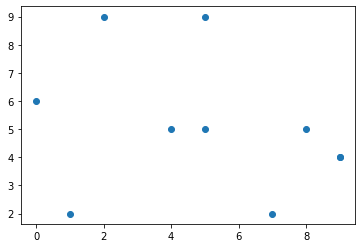

In [988]:
randz = np.random.RandomState(4543)
x5 = pd.Series( randz.randint(0, 10, size=n//10) )
x6 = pd.Series( randz.randint(0, 10, size=n//10) )
plt.scatter(x5, x6); 

scalg.norm( x5 - x6 )

df3 = pd.DataFrame( dict(x1=x5, x2=x6 ) )
df3['edist'] = df3.apply( lambda x: scalg.norm(x) , axis=1) ### TODO: the math 
df3['power'] = df3.apply( lambda x: x.x1**x.x2 , axis=1) # 
df3[:1]

x5[np.where( np.diff(np.sign(np.diff(x5))) == -2)[0] + 1 ].to_frame().reset_index()[:1]
pd.concat([x5, x6], axis=1)[:1]#.reset_index(drop=True)[:3]

x5.argmin(), x5.argmax() #=== x5.idxmin(), x5.idxmax()
df3.ne(x5, axis=0)[:1]

---
---


,score,attempts,name
f,20.0,3,Michael
j,19.0,1,Jonas
c,16.5,2,Katherine
g,14.5,1,Matthew
a,12.5,1,Anastasia
e,9.0,2,Emily
b,9.0,3,Dima
i,8.0,2,Kevin
h,NaN,1,Laura
d,NaN,3,James


a    Anastasia
b         Dima
c    Katherine
d       Suresh
e        Emily
f      Michael
g      Matthew
h        Laura
i        Kevin
j        Jonas
Name: name, dtype: object

,name,score,attempts,qualify,color
a,Anastasia,12.5,1,True,Red
b,Dima,9.0,3,False,Blue
c,Katherine,16.5,2,True,Orange
d,James,NaN,3,False,Red
e,Emily,9.0,2,False,Gray
f,Michael,20.0,3,True,Gray
g,Matthew,14.5,1,True,Blue
h,Laura,NaN,1,False,Green
i,Kevin,8.0,2,False,Green
j,Jonas,19.0,1,True,Red


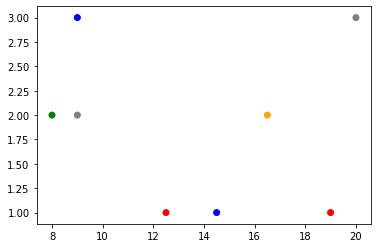

In [1128]:
exam_data  = {'name': ['Anastasia', 'Dima', 'Katherine', 'James', 'Emily', 'Michael', 'Matthew', 'Laura', 'Kevin', 'Jonas'],
        'score': [12.5, 9, 16.5, np.nan, 9, 20, 14.5, np.nan, 8, 19],
        'attempts': [1, 3, 2, 3, 2, 3, 1, 1, 2, 1],
        'qualify': ['yes', 'no', 'yes', 'no', 'no', 'yes', 'yes', 'no', 'no', 'yes']}
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j']

df4 = pd.DataFrame(exam_data , index=labels)
# df4[:3]
# df4.iloc[-3:]
# df4.info()
# df4.shape
# df4.describe(include='all')

## are same
# df4.iloc[::3][['name', 'score']]
# df4[['name', 'score']][::3]
# df4.iloc[[3,6],[0,3]] ##TODO: slice within


print("---")
# df4[ df4.attempts > 2]
# df4[ df4.score.isna() ]
# df4[ df4.score.isnull() ]
# df4[ (df4.score >= 15) & (df4.score <= 20) ]
# df4[df4.score.between(15, 20) ]
# df4[ (df4.attempts < 2) & (df4.score > 15) ]
# df4.loc['d', 'score'] = 11.5
# df4.set_value(8, 'score', 10.2)
# df4.loc[ 'k' ] = ["Donald", 11.6, 3, 'yes']
# df4.append( ['l', 'Johnie', 19.4, 4, 'yes'] )#, ignore_index=True ) << fails at col index match and so each entry is a row
# df4.append( pd.Series(['Johnie', 19.4, 4, 'yes']) , ignore_index=True ) << fails at col index match and so extra cols 
# df4.append( {'name':'Johnie', 'score':19.4, 'attempts':4, 'qualify':'yes'} , ignore_index=True )
# df4 = df4.drop('k')
# df4.drop('k', inplace=True)
# df4


print("---")
df4.sort_values(by=[ 'score', 'attempts', 'name'], 
                ascending=[False, True, False])[['score', 'attempts', 'name']]

df4.qualify = df4.qualify.map({'yes':True, 'no':False})
df4.name.replace('James', 'Suresh', inplace=False)
# df4.pop('attempts')
df4['color'] = ['Red','Blue','Orange','Red','White','White','Blue','Green','Green','Red']
df4.color.replace('White', 'Gray', inplace=True)
# df4.info()
# df4.describe(include='all')
df4

plt.scatter(df4.score, df4.attempts, c=df4.color)

In [1133]:
list(df4.columns), df4.columns.values

# pd.set_option('display.max_rows', 30)
# pd.set_option('display.max_columns', 30)
# pd.set_option('display.width', 30)
# df4
df4.iloc[[3]]

# df4.drop( df4.index[[2,4]] )

# df4.isnull().values.sum()
# df4.isna().values.sum()
# df4.fillna( 0 , inplace=True)


r1 = "{i:<2s}. {n:<10s} scored {s:2.1f}\tafter {a:2d} attempts. Qualify={q:<5s}".format
for i, x in df4.iterrows():
    print( r1(i=i, n=x['name'], s=x.score, a=x.attempts, q=str(x.qualify) ) )

# df4.to_csv('scores.csv', index=False, sep='\t')
# pd.read_csv('scores.csv', sep='\t' )

df4.groupby(['qualify']).size().reset_index( name='# Qualifiers')

(['name', 'score', 'attempts', 'qualify', 'color'],
 array(['name', 'score', 'attempts', 'qualify', 'color'], dtype=object))

,name,score,attempts,qualify,color
d,James,NaN,3,False,Red


a . Anastasia  scored 12.5	after  1 attempts. Qualify=True 
b . Dima       scored 9.0	after  3 attempts. Qualify=False
c . Katherine  scored 16.5	after  2 attempts. Qualify=True 
d . James      scored nan	after  3 attempts. Qualify=False
e . Emily      scored 9.0	after  2 attempts. Qualify=False
f . Michael    scored 20.0	after  3 attempts. Qualify=True 
g . Matthew    scored 14.5	after  1 attempts. Qualify=True 
h . Laura      scored nan	after  1 attempts. Qualify=False
i . Kevin      scored 8.0	after  2 attempts. Qualify=False
j . Jonas      scored 19.0	after  1 attempts. Qualify=True 


,qualify,# Qualifiers
0,False,5
1,True,5


In [1220]:
df4.rename(columns={'color':'team'}, inplace=True)
shuffled = df4.sample(frac=1, random_state=7575)  
# shuffled

train = df4.sample(frac=0.7, random_state=7575) 
test = df4.drop( train.index )

train.shape, test.shape 

# test.name.values
# test.name.to_list()
# test.score.argmax()
# test.columns.to_list().contains('score')
# pd.Series('score').isin(test.columns.values)
'score' in test.columns
# test.dtypes
# test.score.astype(int)

###add_prefix, add_suffix to col name
# df4.add_prefix('grad_')
# df4.loc[::-1, ::-1]
# df4.columns.str.lower().str.rstrip()
### select cols by dtype
# df4.select_dtypes(include='number')

df4.iloc[0, [ df4.columns.get_loc(x) for x in ['name', 'team'] ] ].values

# df4.nlargest(3, 'score')
# df4.nsmallest(3, 'attempts')

# df4.score.cumsum()
print("----")
# print('“many_to_one” or “m:1”: check if merge keys are unique in right dataset:')
# df_many_to_one = pd.merge(df, df1, validate = "many_to_one")

print("----")
# df4.groupby(['team']).size()
df4.groupby(['team'])['name'].apply(list)
# df4.groupby(['team','qualify'])['name'].apply(list)
# df4.groupby(['team','qualify']).mean() #.reset_index()


print("----")
df4['cat_scores_bins']= pd.cut(df4.score, 4 )#, labels=['g1', 'g2', 'g3', 'g4'])
df4['cat_scores'] = pd.cut(df4.score, 4, labels=['g1', 'g2', 'g3', 'g4'])
# df4
df4['team'] = df4.team.astype('category')

# df4.info(memory_usage='deep')
# df4.describe(include='all')

print("----")
m = df4.score.mean()
print( "Score mean = ", m)
df4.query( 'score < @m')

((7, 7), (3, 7))

True

array(['Anastasia', 'Red'], dtype=object)

----
----


team
Blue                [Dima, Matthew]
Gray               [Emily, Michael]
Green                [Laura, Kevin]
Orange                  [Katherine]
Red       [Anastasia, James, Jonas]
Name: name, dtype: object

----
----
Score mean =  13.5625


,name,score,attempts,qualify,team,cat_scores,cat_scores_bins
a,Anastasia,12.5,1,True,Red,g2,"(11.0, 14.0]"
b,Dima,9.0,3,False,Blue,g1,"(7.988, 11.0]"
e,Emily,9.0,2,False,Gray,g1,"(7.988, 11.0]"
i,Kevin,8.0,2,False,Green,g1,"(7.988, 11.0]"


In [1283]:
# i, u = pd.factorize(df4.team)
# i
# u

# for g, n in df4.groupby(['team']):
#     print( g, ":\t", len(n) )
  

df4.groupby(['team'])['name'].apply(list)

# gdf1 = df4.groupby(['team']).agg(
#     {'score': ['mean', 'sum', 'min', 'max', np.mean], #np.mean, np.sum, np.min, np.max
#      'qualify' : ['count']   ,
#      'attempts' : 'mean'
#     }
# )
# gdf1.reset_index()
# gdf1.describe()
# gdf1.get_group('Red')

# df4.groupby(['cat_scores'], axis='columns', level=1).groups

grouper = df4.groupby(['team'])
grouper.groups
grouper.get_group('Red') #.describe()
# grouper.describe()
# df4.groupby(['team', 'qualify']).size().reset_index().groupby(['team', 'qualify'])[[0]].max()

team
Blue                [Dima, Matthew]
Gray               [Emily, Michael]
Green                [Laura, Kevin]
Orange                  [Katherine]
Red       [Anastasia, James, Jonas]
Name: name, dtype: object

{'Blue': Index(['b', 'g'], dtype='object'),
 'Gray': Index(['e', 'f'], dtype='object'),
 'Green': Index(['h', 'i'], dtype='object'),
 'Orange': Index(['c'], dtype='object'),
 'Red': Index(['a', 'd', 'j'], dtype='object')}

,name,score,attempts,qualify,team,cat_scores,cat_scores_bins
a,Anastasia,12.5,1,True,Red,g2,"(11.0, 14.0]"
d,James,NaN,3,False,Red,NaN,NaN
j,Jonas,19.0,1,True,Red,g4,"(17.0, 20.0]"


0
team   qualify   
Blue   False    1
       True     1
Gray   False    1
       True     1
Green  False    2
       True     0
Orange False    0
       True     1
Red    False    1
       True     2

In [1218]:
pd.util.testing.makeDataFrame().sample(3)
pd.util.testing.makeMissingDataframe().sample(3)
pd.util.testing.makeTimeDataFrame().sample(3)
pd.util.testing.makeMixedDataFrame().sample(3)

# pd.util.testing.makeMissingDataframe().interpolate().sample(30)

,A,B,C,D
MKr46an9Mc,-0.477095,0.843682,-1.491327,-0.371955
EAbdKVPVqy,0.545755,0.129082,0.504215,0.618524
mBBxS5jG3D,-0.364429,-0.885049,0.077128,0.519319


,A,B,C,D
zhAFrhPG1C,0.358765,0.097501,0.661618,-1.312814
g4xNhuEOPW,NaN,-2.491481,-0.815842,0.242782
pPHvA2GFlM,-0.325389,-1.189328,1.551463,-0.157507


,A,B,C,D
2000-02-01,0.607069,0.294224,-1.024150,-0.733874
2000-01-03,0.098655,-2.687752,-0.660122,0.529322
2000-01-07,0.686460,0.317248,0.712604,1.930891


,A,B,C,D
1,1.0,1.0,foo2,2009-01-02
4,4.0,0.0,foo5,2009-01-07
2,2.0,0.0,foo3,2009-01-05


In [1340]:
### ======= pivot tables
df4.groupby(['team'])['score'].apply(list)

df4.pivot_table(index=['team', 'qualify'], 
                aggfunc=[np.mean, np.sum],
                fill_value=0,
               margins=True)

df4.pivot_table(index=['team'], 
                columns=['qualify'], 
                values=['score', 'attempts'], 
                aggfunc=[np.min, np.mean] ,
               margins=True).query("team == ['Red', 'Blue']")

team
Blue            [9.0, 14.5]
Gray            [9.0, 20.0]
Green            [nan, 8.0]
Orange               [16.5]
Red       [12.5, nan, 19.0]
Name: score, dtype: object

mean  \
               attempts   
team   qualify            
Blue   False      3.000   
       True       1.000   
Gray   False      2.000   
       True       3.000   
Green  False      1.500   
Orange True       2.000   
Red    False      3.000   
       True       1.000   
All               1.875   

                         \
                  score   
team   qualify            
Blue   False     9.0000   
       True     14.5000   
Gray   False     9.0000   
       True     20.0000   
Green  False     8.0000   
Orange True     16.5000   
Red    False     0.0000   
       True     15.7500   
All             13.5625   

                    sum  \
               attempts   
team   qualify            
Blue   False          3   
       True           1   
Gray   False          2   
       True           3   
Green  False          3   
Orange True           2   
Red    False          3   
       True           2   
All                  15   

                       
                score  
team   qualify         
Blue   False      9.0  
       True      14.5  
Gray   False      9.0  
       True      20.0  
Green  False      8.0  
Orange True      16.5  
Red    False      0.0  
       True      31.5  
All             108.5

amin           \
        attempts            
qualify    False True All   
team                        
Blue         3.0  1.0   1   
Red          3.0  1.0   1   

                           \
        score               
qualify False  True   All   
team                        
Blue      9.0  14.5   9.0   
Red       NaN  12.5  12.5   

            mean            \
        attempts             
qualify    False True  All   
team                         
Blue         3.0  1.0  2.0   
Red          3.0  1.0  1.0   

                             
        score                
qualify False   True    All  
team                         
Blue      9.0  14.50  11.75  
Red       NaN  15.75  15.75

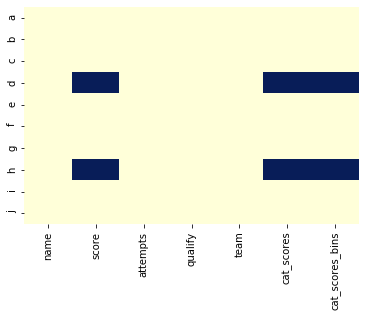

In [1371]:
# list(df4.columns.values)
df4.loc[:, 'name':'qualify'].query('qualify==False & attempts > 2')

### ===== deal NAN ==========

# df4.isna().any()
# df4.isna().sum()
df4.replace({"?": np.nan, "--": np.nan, 'N/A':np.nan}, inplace=True)

# at least 2 use sum, all use mean
# df4.drop( df4[df4.isna().mean(axis=1) > 1].index, axis=0)
# df4.dropna() ## same as at least one with sum
# df4.dropna(thresh=5) ## require that many non-NA values                                                                                                                                                                                                            
# df4.dropna(how='all') ## same as all with mean
# df4.dropna( subset=['score']) ## drop if a given col has na

## --- fill:  some val, prev val (pad), next val (bfill), mean|median of the col
# df4.score.fillna(0, inplace=False)
# df4.score.fillna(method='bfill', inplace=False)
# df4.score.fillna( df4.score.median(), inplace=False)
## fill using linear interpolation method << curve fitting using linear polynomials
# df4.score.interpolate(method='linear', direction='forward', inplace=False)
# df4.mode().iloc[0]
# df4.fillna( df4.mode().iloc[0] )
# df4.score.value_counts(dropna=False).loc[np.nan]

df4.score.isnull().to_numpy().nonzero()

sns.heatmap( df4.isnull(), cbar=False, cmap='YlGnBu'); 